In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns



from numpy.random import uniform
from numpy.random import normal
from numpy.random import exponential
from numpy.random import lognormal

from numpy.random import choice
from numpy.random import permutation


from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import shapiro

from statsmodels.sandbox.stats.multicomp import multipletests
from sklearn.cluster import KMeans


%matplotlib inline

In [6]:
import matplotlib as PLT
PLT.rcParams.update({'figure.max_open_warning': 0})
PLT.rcParams.update({'font.size': 15})

PLT.rcParams['axes.linewidth'] = 2

PLT.rcParams['xtick.major.size'] = 3
PLT.rcParams['xtick.major.width'] = 2

PLT.rcParams['ytick.major.size'] = 3
PLT.rcParams['ytick.major.width'] = 2

In [7]:
def makeTWOscatters(rand_sample1, rand_sample2):
    fig, (ax1,ax2)=plt.subplots(2,1,figsize=(4,4),sharex=True)
    #random scatter for y axis
    norm=normal(0,0.1,len(rand_sample1))
    ax1.scatter(rand_sample1,norm,s=15)
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.set_ylim([-1,1])
    
    ax1.plot([np.mean(rand_sample1),np.mean(rand_sample1)],[-0.35,0.35],color='black',linestyle='--')
    ax1.plot([np.mean(rand_sample1)-np.std(rand_sample1), np.mean(rand_sample1)+np.std(rand_sample1)],
             [-0.75,-0.75],
            color='hotpink',linewidth=2,linestyle='--')      
    ax1.set_yticks([])
    
    
    norm=normal(0,0.1,len(rand_sample2))
    ax2.scatter(rand_sample2,norm,s=15,color='teal')
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.set_ylim([-1,1])
    
    ax2.plot([np.mean(rand_sample2),np.mean(rand_sample2)],[-0.35,0.35],color='black',linestyle='--')
    ax2.plot([np.mean(rand_sample2)-np.std(rand_sample2), np.mean(rand_sample2)+np.std(rand_sample2)],
             [-0.75,-0.75],
            color='hotpink',linewidth=2,linestyle='--')      
    ax2.set_yticks([])

## t-test

In [8]:
K=20
tmp1=normal(10,1,K)


K=20
tmp2=normal(11,1,K)


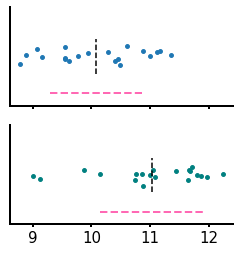

In [9]:
rand_sample1=tmp1
rand_sample2=tmp2
makeTWOscatters(rand_sample1, rand_sample2)

In [156]:
ttest_ind(rand_sample1, rand_sample2,equal_var=False)

In [11]:
###

In [12]:
#rand_sample1=tmp1
#rand_sample2=tmp2

In [13]:
#rand_sample1=tmp1
#rand_sample2=tmp2+1

In [14]:
#rand_sample1=2*(tmp1-tmp1.mean())+tmp1.mean()
#rand_sample2=tmp2

In [15]:
#rand_sample1=2*tmp1
#rand_sample2=2*tmp2

In [16]:
#rand_sample1=choice(tmp1,10,replace=False)
#rand_sample2=choice(tmp2,10,replace=False)

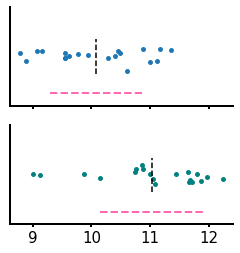

In [17]:

makeTWOscatters(rand_sample1, rand_sample2)

In [107]:
ttest_ind(rand_sample1, rand_sample2,equal_var=False)

## different sample sizes

In [19]:

#K=20
K=1000
tmp1=normal(10,3,K)


#K=20
K=1000
tmp2=normal(11,3,K)

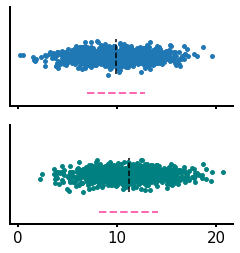

In [20]:
rand_sample1=tmp1
rand_sample2=tmp2
makeTWOscatters(rand_sample1, rand_sample2)

In [108]:
ttest_ind(rand_sample1, rand_sample2,equal_var=False)

In [22]:

K=10
#tmp1=normal(10,3,K)
tmp1=normal(10,0.5,K)


K=10
#tmp2=normal(11,3,K)
tmp2=normal(11,0.5,K)

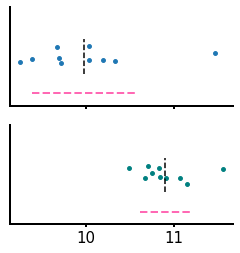

In [23]:
rand_sample1=tmp1
rand_sample2=tmp2
makeTWOscatters(rand_sample1, rand_sample2)

In [109]:
ttest_ind(rand_sample1, rand_sample2,equal_var=False)

## same mean

In [25]:

K=20
tmp1=normal(10,1,K)

K=20
tmp2=normal(10,1,K)

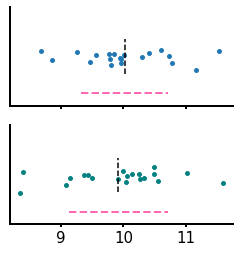

In [26]:
rand_sample1=tmp1
rand_sample2=tmp2
makeTWOscatters(rand_sample1, rand_sample2)

In [110]:
ttest_ind(rand_sample1, rand_sample2,equal_var=False)

In [28]:
k=20
pv=[]

for i in np.arange(0,100):
    rand_sample1=normal(10,1,K)
    rand_sample2=normal(10,1,K)
    
    pv.append(ttest_ind(rand_sample1, rand_sample2,equal_var=False)[1])
pv=np.array(pv)

In [29]:
#pv[pv<0.05]

In [30]:
#hist

## Mann-Whitney test

In [31]:
K=20
tmp1=normal(10,1,K)


K=20
tmp2=normal(11,1,K)


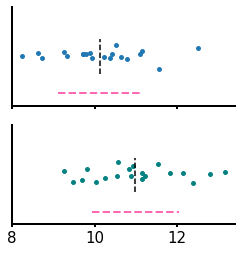

In [32]:
rand_sample1=tmp1
rand_sample2=tmp2
makeTWOscatters(rand_sample1, rand_sample2)

In [111]:
ttest_ind(rand_sample1, rand_sample2,equal_var=False)

In [112]:
mannwhitneyu(rand_sample1, rand_sample2,method='exact')

## add outliers

In [35]:
rand_sample1=list(tmp1)+[14,16,17]
rand_sample2=list(tmp2)

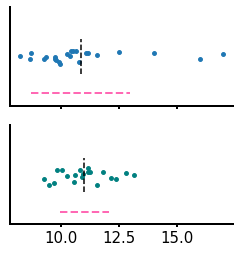

In [36]:
makeTWOscatters(rand_sample1, rand_sample2)

In [113]:
ttest_ind(rand_sample1, rand_sample2,equal_var=False)

In [114]:
mannwhitneyu(rand_sample1, rand_sample2,method='exact')

## log normal

In [39]:
K=20
tmp1=normal(30,3,K)
tmp1=2**tmp1


K=20
tmp2=normal(33,3,K)
tmp2=2**tmp2

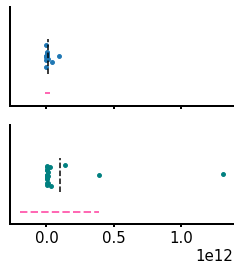

In [40]:
rand_sample1=tmp1
rand_sample2=tmp2
makeTWOscatters(rand_sample1, rand_sample2)

In [115]:
ttest_ind(rand_sample1, rand_sample2,equal_var=False)

In [116]:
mannwhitneyu(rand_sample1, rand_sample2,method='exact')

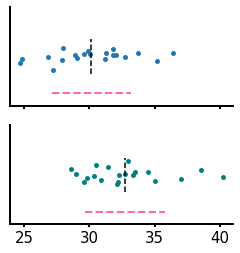

In [43]:
rand_sample1=np.log2(tmp1)
rand_sample2=np.log2(tmp2)
makeTWOscatters(rand_sample1, rand_sample2)

In [117]:
ttest_ind(rand_sample1, rand_sample2,equal_var=False)

In [118]:
mannwhitneyu(rand_sample1, rand_sample2,method='exact')

## correlation test

In [75]:
K=100

#noise=normal(0,2,K)
noise=normal(0,1,K)
#noise=normal(0,0.2,K)

tmp1=normal(10,1,K)
tmp2=tmp1+noise

RS=pd.DataFrame()
RS[1]=tmp1
RS[2]=tmp2

In [76]:
#noise

In [77]:
rand_sample1=RS[1]
rand_sample2=RS[2]

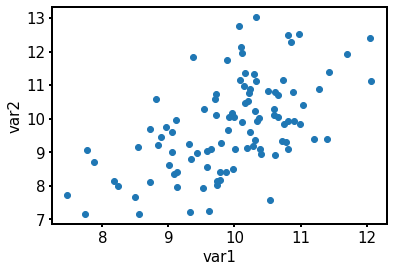

In [78]:
plt.scatter(rand_sample1,rand_sample2)
plt.xlabel('var1');
plt.ylabel('var2');

In [119]:
pearsonr(np.log2(rand_sample1), np.log2(rand_sample2))

In [80]:
ind=choice(RS.index,10,replace=False)

In [81]:
rand_sample1=RS.loc[ind,1]
rand_sample2=RS.loc[ind,2]

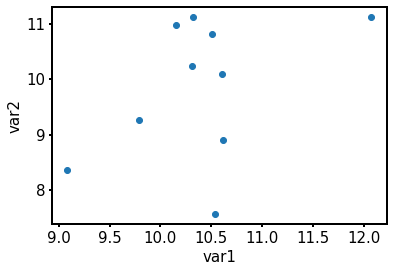

In [82]:
plt.scatter(rand_sample1,rand_sample2)
plt.xlabel('var1');
plt.ylabel('var2');

In [120]:
pearsonr(np.log2(rand_sample1), np.log2(rand_sample2))

## real world case

In [121]:
path='/home/anna/PROJECTS2025/StatDatAnLAB/Distr/'

In [122]:
df=pd.read_csv(path+'diabetes.csv')
df.loc[df['Insulin']==0,'Insulin']=np.nan
df.loc[df['Glucose']==0,'Glucose']=np.nan

df=df.dropna(subset=['Insulin', 'Glucose'])

In [123]:
ind_hasdiabetes=df[df['Outcome']==1].index
ind_nodiabetes=df[df['Outcome']==0].index

Text(0, 0.5, 'Insulin')

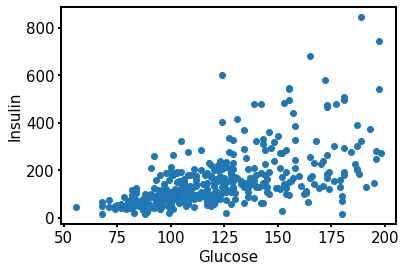

In [124]:
plt.scatter(df['Glucose'], df['Insulin'])
plt.xlabel('Glucose')
plt.ylabel('Insulin')

Text(0, 0.5, 'log2 Insulin')

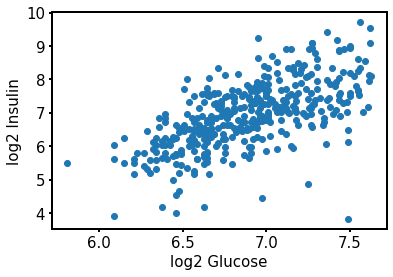

In [125]:
plt.scatter(np.log2(df['Glucose']), np.log2(df['Insulin']))
plt.xlabel('log2 Glucose')
plt.ylabel('log2 Insulin')

In [130]:
pearsonr(np.log2(df.loc[:,'Glucose']), np.log2(df.loc[:,'Insulin']))

In [131]:
pearsonr(np.log2(df.loc[ind_hasdiabetes,'Glucose']), np.log2(df.loc[ind_hasdiabetes,'Insulin']))

Text(0, 0.5, 'log2 Insulin')

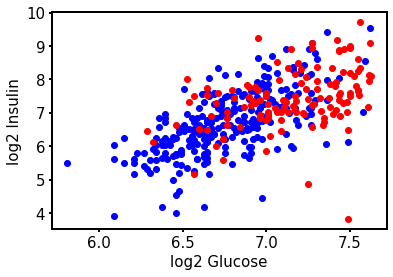

In [129]:
plt.scatter(np.log2(df.loc[ind_nodiabetes,'Glucose']), np.log2(df.loc[ind_nodiabetes,'Insulin']),color='blue')
plt.scatter(np.log2(df.loc[ind_hasdiabetes,'Glucose']), np.log2(df.loc[ind_hasdiabetes,'Insulin']),color='red')
plt.xlabel('log2 Glucose')
plt.ylabel('log2 Insulin')

## log normal data

In [132]:
K=20

noise=normal(0,1,K)

tmp1=normal(10,1,K)
#tmp1=normal(10,2,K)
tmp2=tmp1+noise


rand_sample1=2**tmp1
rand_sample2=2**tmp2

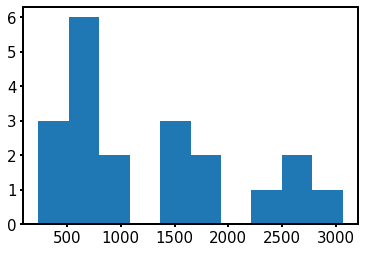

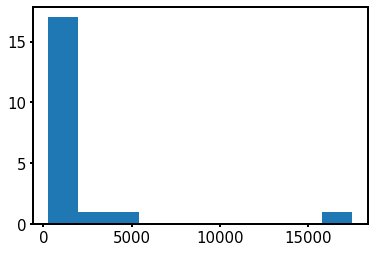

In [133]:
plt.hist(rand_sample1);
plt.show()
plt.hist(rand_sample2);

Text(0, 0.5, 'var 2')

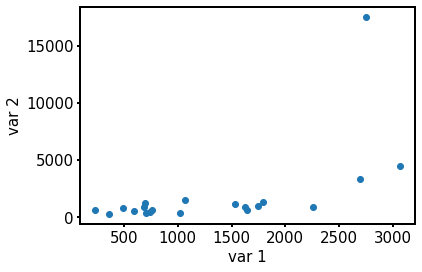

In [134]:
plt.scatter(rand_sample1, rand_sample2)
plt.xlabel('var 1')
plt.ylabel('var 2')

In [149]:
pearsonr(rand_sample1, rand_sample2)

In [150]:
spearmanr(rand_sample1, rand_sample2)

Text(0, 0.5, 'log2 var 2')

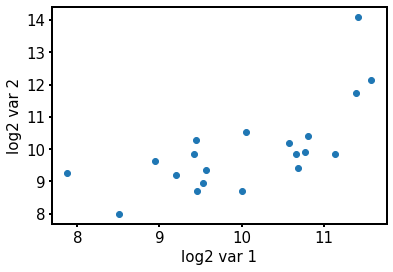

In [137]:
plt.scatter(np.log2(rand_sample1), np.log2(rand_sample2))
plt.xlabel('log2 var 1')
plt.ylabel('log2 var 2')

In [151]:
pearsonr(np.log2(rand_sample1), np.log2(rand_sample2))

In [152]:
spearmanr(np.log2(rand_sample1), np.log2(rand_sample2))

# assumptions

In [140]:
b=np.arange(20,60)
rand_sample1=b

In [141]:
a=list(np.arange(100,120))+list(np.arange(120,100,-1))
rand_sample2=a+normal(0,2,len(a))

Text(0, 0.5, 'concentration')

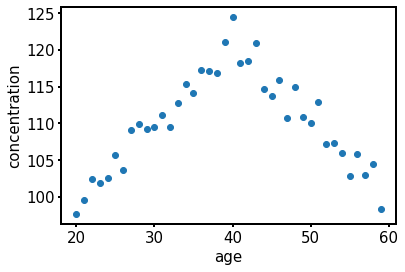

In [142]:
plt.scatter(rand_sample1,rand_sample2)
plt.xlabel('age')
plt.ylabel('concentration')

In [153]:
pearsonr(rand_sample1,rand_sample2)

In [154]:
spearmanr(rand_sample1,rand_sample2)

## "no relationship between variables"

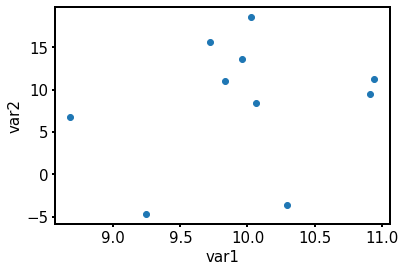

pearson pv = 0.56

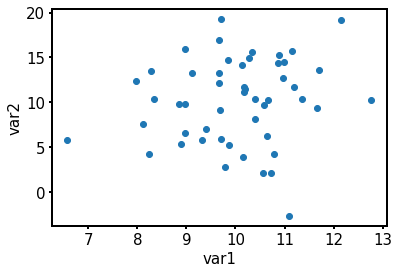

pearson pv = 0.31

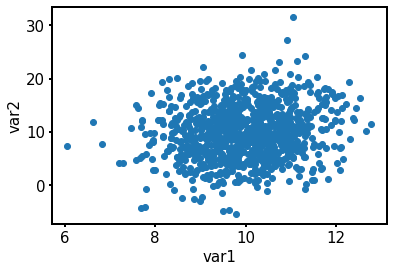

pearsonr pv = 5.8e-07

In [145]:
K=1000

noise=normal(0,5,K)

tmp1=normal(10,1,K)
tmp2=tmp1+noise

RS=pd.DataFrame()
RS[1]=tmp1
RS[2]=tmp2

In [146]:
ind=choice(RS.index,1000,replace=False)

rand_sample1=RS.loc[ind,1]
rand_sample2=RS.loc[ind,2]

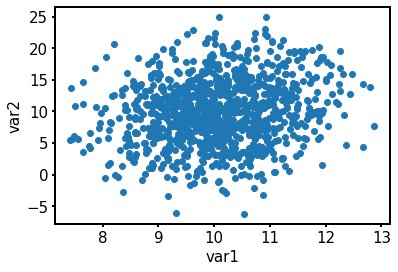

In [147]:
plt.scatter(rand_sample1,rand_sample2)
plt.xlabel('var1');
plt.ylabel('var2');

In [155]:
pearsonr(rand_sample1,rand_sample2)